In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [8]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [10]:
target_name='Outcome'
q=data[target_name]
p=data.drop(target_name,axis=1)

In [11]:
p.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [12]:
q.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(p)
SSX=scaler.transform(p)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_tr,x_te,y_tr,y_te = train_test_split(p,q,test_size=0.30,random_state=1)  #Splitting the data into Train and Test data
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [16]:
from sklearn.linear_model import LogisticRegression #Implementing Logistic Regression

In [17]:
m_1 = LogisticRegression(solver='liblinear')
m_1.fit(x_tr,y_tr)

LogisticRegression(solver='liblinear')

In [18]:
ypred_m_1 = m_1.predict(x_te)
print(ypred_m_1)
print('Training score',m_1.score(x_tr,y_tr))
print('Testing score',m_1.score(x_te,y_te))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Training score 0.7690875232774674
Testing score 0.7748917748917749


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
cm_m_1 = confusion_matrix(y_te,ypred_m_1)
print(cm_m_1)
print(classification_report(y_te,ypred_m_1))
n=(cm_m_1[0][0]+cm_m_1[1][1])/(cm_m_1[0][0]+cm_m_1[0][1]+cm_m_1[1][0]+cm_m_1[1][1])
a1=int((round(n,2))*100)

[[131  15]
 [ 37  48]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [21]:
from sklearn.neighbors import KNeighborsClassifier  #Implementing KNN Classification

In [22]:
m_2 = KNeighborsClassifier(n_neighbors=13) 
m_2.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=13)

In [23]:
ypred_m_2 = m_2.predict(x_te)
print(ypred_m_2)
print('Training score',m_2.score(x_tr,y_tr))
print('Testing score',m_2.score(x_te,y_te))

[1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Training score 0.776536312849162
Testing score 0.7489177489177489


In [24]:
cm_m_2 = confusion_matrix(y_te,ypred_m_2)
print(cm_m_2)
print(classification_report(y_te,ypred_m_2))
n=(cm_m_2[0][0]+cm_m_2[1][1])/(cm_m_2[0][0]+cm_m_2[0][1]+cm_m_2[1][0]+cm_m_2[1][1])
a2=int((round(n,2))*100)

[[125  21]
 [ 37  48]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       146
           1       0.70      0.56      0.62        85

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231



In [25]:
from sklearn.tree import DecisionTreeClassifier  #Implementing Decision Tree Classification

In [26]:
m_3=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=12)
m_3.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=4, min_samples_split=12)

In [27]:
ypred_m_3 = m_3.predict(x_te)
print(ypred_m_3)
print('Training score',m_3.score(x_tr,y_tr))
print('Testing score',m_3.score(x_te,y_te))

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
Training score 0.7821229050279329
Testing score 0.7489177489177489


In [28]:
cm_m_3 = confusion_matrix(y_te,ypred_m_3)
print(cm_m_3)
print(classification_report(y_te,ypred_m_3))
n=(cm_m_3[0][0]+cm_m_3[1][1])/(cm_m_3[0][0]+cm_m_3[0][1]+cm_m_3[1][0]+cm_m_3[1][1])
a3=int((round(n,2))*100)

[[131  15]
 [ 43  42]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       146
           1       0.74      0.49      0.59        85

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [29]:
from sklearn.ensemble import RandomForestClassifier  #Implementing Random Forest Classification

In [30]:
m_4=RandomForestClassifier(n_estimators=80,criterion='entropy',max_depth=6,min_samples_split=7)
m_4.fit(x_tr,y_tr)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=7,
                       n_estimators=80)

In [31]:
ypred_m_4 = m_4.predict(x_te)
print(ypred_m_4)
print('Training score',m_4.score(x_tr,y_tr))
print('Testing score',m_4.score(x_te,y_te)) 

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Training score 0.8584729981378026
Testing score 0.7878787878787878


In [32]:
cm_m_4 = confusion_matrix(y_te,ypred_m_4)
print(cm_m_4)
print(classification_report(y_te,ypred_m_4))
n=(cm_m_4[0][0]+cm_m_4[1][1])/(cm_m_4[0][0]+cm_m_4[0][1]+cm_m_4[1][0]+cm_m_4[1][1])
a4=int((round(n,2))*100)

[[130  16]
 [ 33  52]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.76      0.61      0.68        85

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [33]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_tr,y_tr)

SVC()

In [34]:
ypred_m_5 = sv.predict(x_te)
print(ypred_m_5)
print('Training score',sv.score(x_tr,y_tr))
print('Testing score',sv.score(x_te,y_te))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Training score 0.7541899441340782
Testing score 0.7748917748917749


In [35]:
cm_m_5 = confusion_matrix(y_te,ypred_m_5)
print(cm_m_4)
print(classification_report(y_te,ypred_m_5))
n=(cm_m_5[0][0]+cm_m_5[1][1])/(cm_m_5[0][0]+cm_m_5[0][1]+cm_m_5[1][0]+cm_m_5[1][1])
a5=int((round(n,2))*100)

[[130  16]
 [ 33  52]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       146
           1       0.84      0.48      0.61        85

    accuracy                           0.77       231
   macro avg       0.80      0.71      0.73       231
weighted avg       0.79      0.77      0.76       231



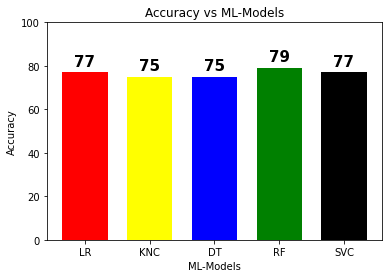

In [36]:
y=[a1,a2,a3,a4,a5]
x=["LR","KNC","DT","RF","SVC"]
plt.bar(x,y,width=0.7,color=['red','yellow','blue','green','black'])
plt.ylabel("Accuracy")
plt.xlabel("ML-Models")
plt.title("Accuracy vs ML-Models")
plt.ylim(0,100)
for i,v in enumerate(y):
    plt.text(i,v+3,str(v),ha='center',weight="bold",size=15)
plt.show()

In [37]:
from demo_pred import*

In [38]:
demo_prediction(m_4)

Enter the data for the follwing parameters
Pregnancies: 6
Glucose: 130
BloodPressure: 120
SkinThickness: 25
Insulin: 80
BMI: 35
DiabetesPedigreeFunction: 0.6
Age: 50
 
Result: Higher level of diabetes risk
